# Titanic v1

#### Import Libraries

In [1]:
# Standard Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Function to fill missing values
from sklearn.impute import SimpleImputer

# EDA/ Data Preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.compose import make_column_transformer

# Model Splitting
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import VarianceThreshold

# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Scoring Metrics
from sklearn.metrics import *

#### Reading Data

In [2]:
# Read CSV file
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
submit = pd.read_csv('./gender_submission.csv')

#### Settings

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None) 

In [4]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.00,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.00,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.00,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.00,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.00,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.00,2,0,A/4 48871,24.1500,NaN,S


#### Initial Analysis of Dataset

In [5]:
# Shape of Data
print(f"Shape of Train set (raw) : {train.shape}")
print(f"Shape of Test set (raw) : {test.shape}")

Shape of Train set (raw) : (891, 12)
Shape of Test set (raw) : (418, 11)


In [6]:
# Missing variable
print(f"Columns in Train but not in Test : {[col for col in train.columns if col not in test.columns]}")
print(f"Columns in Test but not in Train : {[col for col in test.columns if col not in train.columns]}")

Columns in Train but not in Test : ['Survived']
Columns in Test but not in Train : []


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# Drop ['PassengerId'] in train but keep ['PassengerId'] in test
train.drop(['PassengerId'], axis = 'columns', inplace = True)
test_id = test[['PassengerId']]
test.drop(['PassengerId'], axis = 'columns', inplace = True)

# Plan

Considering the small size of the dataset, I will tackle each column sequentially.

```Pclass``` : Ordinal Encoding done.

```Name``` : Attempt to split how to address them.

```Sex``` : Use pd.get_dummies(), apply One Hot Encoding.

```Age``` : Impute with mean or median, but might be able to get more information looking at ```SibSp``` and ```Parch``` (Try in v2)

```SibSp``` : Combine with ```Parch```

```Parch``` : Combine with ```SibSp```

```Ticket``` : Drop in v1, in v2, maybe can try use it by splitting the type of ticket

```Fare``` : Check distribution, might need to transform it.

```Cabin``` : Alot of missing values, might need to drop it.

```Embarked``` : Only 2 missing values, just impute with mode.

## Sex

In [10]:
# Use OHE
sex_dict = {'male' : 0, 'female' : 1}

# Map across train or test data
train['sex_ohe'] = train['Sex'].map(sex_dict)
test['sex_ohe'] = test['Sex'].map(sex_dict)

# Remove ['Sex'] from train and test
train.drop(['Sex'], axis = 'columns', inplace = True)
test.drop(['Sex'], axis = 'columns', inplace = True)

## Age

[Text(0.5, 1.0, 'Age Distribution (Train)')]

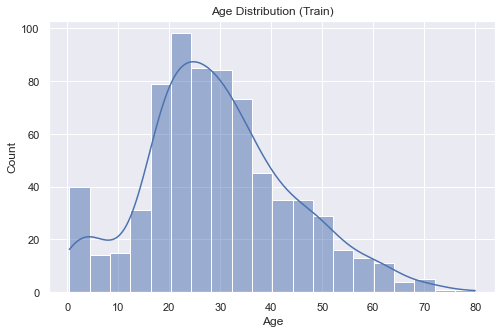

In [11]:
# Check distribution
sns.set(rc = {'figure.figsize':(8,5)})
sns.histplot(x = train['Age'], kde = True, bins = 20).set(title = "Age Distribution (Train)")

Age distribution is slightly right skewed. Hence, impute with median.

In [12]:
# Impute with median
train['Age_imputed'] = train['Age'].fillna(train['Age'].median())

Text(0.5, 1.0, 'After')

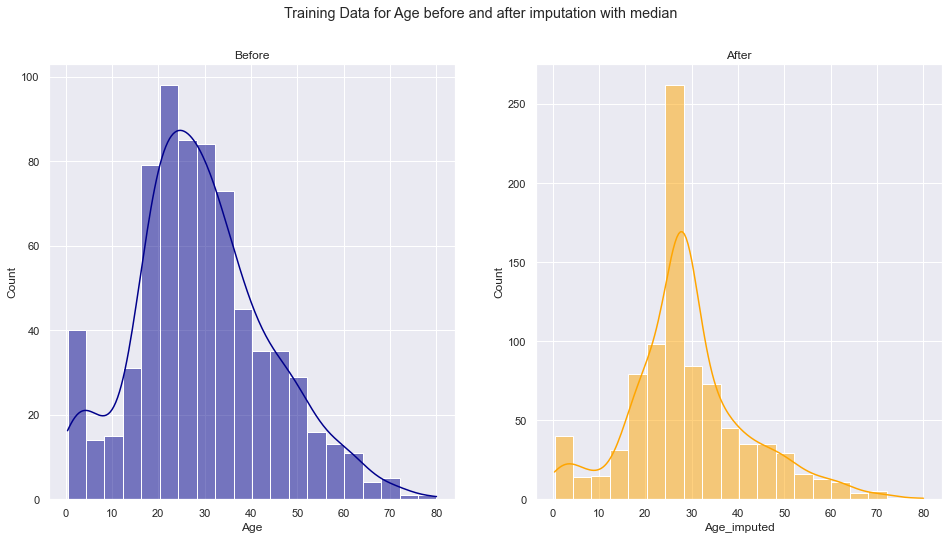

In [13]:
# Plot distribution after imputation
fig, axes = plt.subplots(1, 2, figsize = (16,8))
plt.suptitle("Training Data for Age before and after imputation with median")
sns.histplot(data = train, x = 'Age', color = 'darkblue', kde = True, bins = 20, ax = axes[0])
axes[0].set_title("Before")
sns.histplot(data = train, x = 'Age_imputed', color = 'orange', kde = True, bins = 20, ax = axes[1])
axes[1].set_title("After")

In [14]:
# Check distribution before and after imputation of Age for test
test['Age_imputed'] = test['Age'].fillna(test['Age'].median())

Text(0.5, 1.0, 'After')

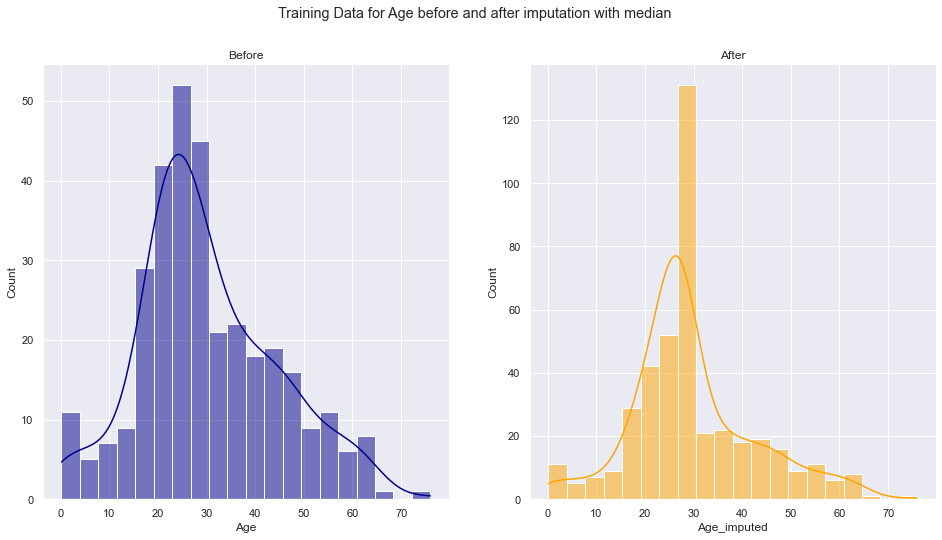

In [15]:
# Plot distribution after imputation
fig, axes = plt.subplots(1, 2, figsize = (16,8))
plt.suptitle("Training Data for Age before and after imputation with median")
sns.histplot(data = test, x = 'Age', color = 'darkblue', kde = True, bins = 20, ax = axes[0])
axes[0].set_title("Before")
sns.histplot(data = test, x = 'Age_imputed', color = 'orange', kde = True, bins = 20, ax = axes[1])
axes[1].set_title("After")

From the above distribution, it is not wise to impute with median. However, I would assume that Age will play an important role. For now I will remove the age. In v2, i will attempt to fit into the distribution based on the mean and std of the distribution before imputation.

In [16]:
# Remove age from train and test datasets
train.drop(columns = ['Age', 'Age_imputed'], axis = 'columns', inplace = True)
test.drop(columns = ['Age', 'Age_imputed'], axis = 'columns', inplace = True)

In [17]:
test.head()

,Pclass,Name,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_ohe
0,3,"Kelly, Mr. James",0,0,330911,7.8292,NaN,Q,0
1,3,"Wilkes, Mrs. James (Ellen Needs)",1,0,363272,7.0000,NaN,S,1
2,2,"Myles, Mr. Thomas Francis",0,0,240276,9.6875,NaN,Q,0
3,3,"Wirz, Mr. Albert",0,0,315154,8.6625,NaN,S,0
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,3101298,12.2875,NaN,S,1


## SibSp and Parch

In [18]:
# Combine to form 'relatives' column
train['relatives'] = train['SibSp'] + train['Parch']
test['relatives'] = test['SibSp'] + test['Parch']

# form a isAlone column, 0: not alone, 1: is alone
train.loc[train['relatives'] > 0, 'isAlone'] = 0
train.loc[train['relatives'] == 0, 'isAlone'] = 0

test.loc[test['relatives'] > 0, 'isAlone'] = 0
test.loc[test['relatives'] == 0, 'isAlone'] = 0

In [19]:
# Convert isAlone to int
train['isAlone'] = train['isAlone'].astype(int)
test['isAlone'] = test['isAlone'].astype(int)

In [20]:
# [Remove 'relatives', 'SibSp', 'Parch'] from train and test
train.drop(columns = ['relatives', 'SibSp', 'Parch'], axis = 'columns', inplace = True)
test.drop(columns = ['relatives', 'SibSp', 'Parch'], axis = 'columns', inplace = True)

## Ticket

In [21]:
# Drop from dataset
train.drop(['Ticket'], axis = 'columns', inplace = True)
test.drop(['Ticket'], axis = 'columns', inplace = True)

## Fare

In [22]:
test.isna().sum()

Pclass        0
Name          0
Fare          1
Cabin       327
Embarked      0
sex_ohe       0
isAlone       0
dtype: int64

In [23]:
# impute fare with median
test['Fare'] = test['Fare'].fillna(test['Fare'].median())

[Text(0.5, 1.0, 'Test')]

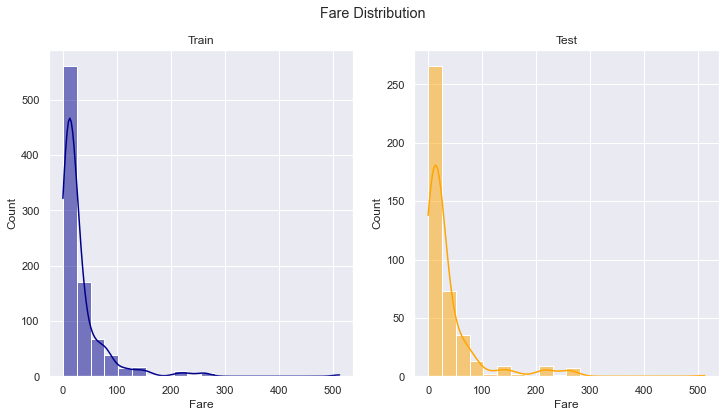

In [24]:
# Check distribution
sns.set(rc = {'figure.figsize':(12,6)})
fig, axes = plt.subplots(1,2)
plt.suptitle("Fare Distribution")
sns.histplot(x = train['Fare'], kde = True, bins = 20, ax = axes[0], color = 'darkblue').set(title = "Train")
sns.histplot(x = test['Fare'], kde = True, bins = 20, ax = axes[1], color = 'orange').set(title = "Test")

From the distribution, a large majority have fair tickets below $20.

In [25]:
# apply log1p transformation, if num close to 0, log(1+num) is used.
train['log_fare'] = np.log1p(train['Fare'])
test['log_fare'] = np.log1p(test['Fare'])

[Text(0.5, 1.0, 'Test')]

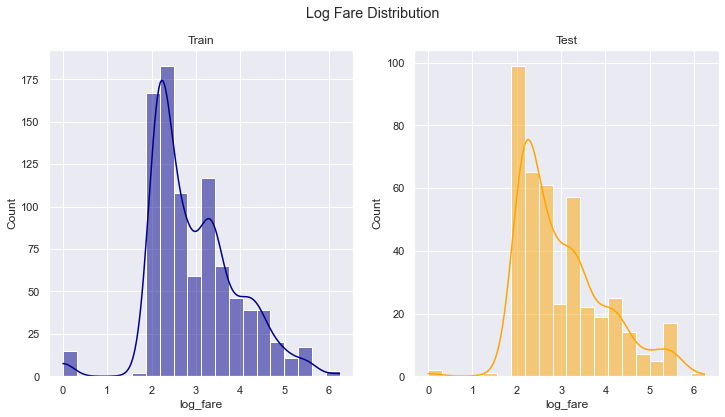

In [26]:
# Check distribution
sns.set(rc = {'figure.figsize':(12,6)})
fig, axes = plt.subplots(1,2)
plt.suptitle("Log Fare Distribution")
sns.histplot(x = train['log_fare'], kde = True, bins = 20, ax = axes[0], color = 'darkblue').set(title = "Train")
sns.histplot(x = test['log_fare'], kde = True, bins = 20, ax = axes[1], color = 'orange').set(title = "Test")

In [27]:
# Drop 'Fare'
train.drop(['Fare'], axis = 'columns', inplace = True)
test.drop(['Fare'], axis = 'columns', inplace = True)

In [28]:
test.isna().sum()

Pclass        0
Name          0
Cabin       327
Embarked      0
sex_ohe       0
isAlone       0
log_fare      0
dtype: int64

## Cabin

In [29]:
# Drop cabin
train.drop(['Cabin'], axis = 'columns', inplace = True)
test.drop(['Cabin'], axis = 'columns', inplace = True)

## Embarked

In [30]:
# Check test set
test['Embarked'].isna().sum()

0

[Text(0.5, 1.0, 'Test')]

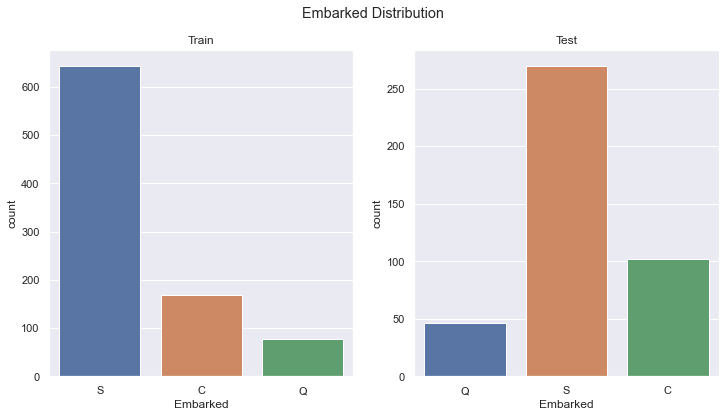

In [31]:
# Check distribution
sns.set(rc = {'figure.figsize':(12,6)})
fig, axes = plt.subplots(1,2)
plt.suptitle("Embarked Distribution")
sns.countplot(x = train['Embarked'], ax = axes[0]).set(title = "Train")
sns.countplot(x = test['Embarked'], ax = axes[1]).set(title = "Test")

In [32]:
# Impute with mode for train and test sets
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode())
test['Embarked'] = test['Embarked'].fillna(test['Embarked'].mode())

In [33]:
# Check for strength of correlation between 'Survived' and 'Embarked'

# Use Cramer's V
def cramersV(df, twoCols):
    
    df_sliced = df.loc[:, twoCols]
    data = pd.crosstab(index = df_sliced[twoCols[0]], columns = df_sliced[twoCols[1]])
    
    X2 = stats.chi2_contingency(data, correction=False)[0]
    n = len(df)
    minDim = min(data.shape)-1
    
    V = np.sqrt((X2/n) / minDim)
    
    return V

In [34]:
print(cramersV(train, ['Survived', 'Embarked']))

0.1724229844479072


The correlation is not strong, for this version I will keep it.

In [35]:
# Use dummies to encode it
train_embarked_dummies = pd.get_dummies(train['Embarked'])
test_embarked_dummies = pd.get_dummies(test['Embarked'])

train = pd.concat([train, train_embarked_dummies], axis = 'columns')
test = pd.concat([test, test_embarked_dummies], axis = 'columns')

# Drop embarked
train.drop(['Embarked'], axis = 'columns', inplace = True)
test.drop(['Embarked'], axis = 'columns', inplace = True)

## Name

In [36]:
# Drop the name, because the main aim of the name is to categorize the age of the person.
train.drop(['Name'], axis = 'columns', inplace = True)
test.drop(['Name'], axis = 'columns', inplace = True)

## Normalize the numerical columns

In [37]:
train.head()

,Survived,Pclass,sex_ohe,isAlone,log_fare,C,Q,S
0,0,3,0,0,2.110213,0,0,1
1,1,1,1,0,4.280593,1,0,0
2,1,3,1,0,2.188856,0,0,1
3,1,1,1,0,3.990834,0,0,1
4,0,3,0,0,2.202765,0,0,1


In [38]:
test.head()

,Pclass,sex_ohe,isAlone,log_fare,C,Q,S
0,3,0,0,2.178064,0,1,0
1,3,1,0,2.079442,0,0,1
2,2,0,0,2.369075,0,1,0
3,3,0,0,2.268252,0,0,1
4,3,1,0,2.586824,0,0,1


In [39]:
# MinMax scalar
mmScaler = MinMaxScaler()

In [40]:
# Scale data
train_scaled = mmScaler.fit_transform(train[['Pclass', 'log_fare']])
train_scaled_df = pd.DataFrame(train_scaled)
train_scaled_df.columns = ['scaled_Pclass', 'scaled_log_fare']

test_scaled = mmScaler.fit_transform(test[['Pclass', 'log_fare']])
test_scaled_df = pd.DataFrame(test_scaled)
test_scaled_df.columns = ['scaled_Pclass', 'scaled_log_fare']

In [41]:
# put back into data
train = pd.concat([train, train_scaled_df], axis = 'columns')
train.drop(columns = ['Pclass', 'log_fare'], axis = 'columns', inplace = True)

test = pd.concat([test, test_scaled_df], axis = 'columns')
test.drop(columns = ['Pclass', 'log_fare'], axis = 'columns', inplace = True)

# Split the data

In [42]:
test.head()

,sex_ohe,isAlone,C,Q,S,scaled_Pclass,scaled_log_fare
0,0,0,0,1,0,1.0,0.348997
1,1,0,0,0,1,1.0,0.333195
2,0,0,0,1,0,0.5,0.379604
3,0,0,0,0,1,1.0,0.363449
4,1,0,0,0,1,1.0,0.414494


In [43]:
train.head()

,Survived,sex_ohe,isAlone,C,Q,S,scaled_Pclass,scaled_log_fare
0,0,0,0,0,0,1,1.0,0.338125
1,1,1,0,1,0,0,0.0,0.685892
2,1,1,0,0,0,1,1.0,0.350727
3,1,1,0,0,0,1,0.0,0.639463
4,0,0,0,0,0,1,1.0,0.352955


In [44]:
X_train, X_test, y_train, y_test = train_test_split(train.iloc[:, 1:], train.iloc[:, 0], test_size = 0.2,
                                                    random_state = 26)

# Models

In [45]:
# Models
dt = DecisionTreeClassifier(random_state = 26)
rf = RandomForestClassifier()
knn = KNeighborsClassifier(n_neighbors = 10)
xgb = XGBClassifier(booster = 'gbtree')

In [46]:
# Print scores
def print_score(test, pred):
    print(f"Accuracy : {round(accuracy_score(test, pred), 3)}%")
    print(f"Recall : {round(recall_score(test, pred), 3)}%")
    print(f"Precision : {round(precision_score(test, pred), 3)}%")
    print(f"f1 Score : {round(f1_score(test, pred), 3)}%")

## Decision Tree

In [47]:
# fitting the model
dt.fit(X_train, y_train)

# predictions
y_pred = dt.predict(X_test)

# print score
print_score(y_test, y_pred)

Accuracy : 0.782%
Recall : 0.635%
Precision : 0.714%
f1 Score : 0.672%


In [48]:
# Hyperparameter tuning for DT
dt_grid = {'max_depth': [3,4,5], 'min_samples_leaf': [2,4,6,8,10], 'min_samples_split':
       [2,3,4,5,6,7,8,9,10]}

dt_cv = GridSearchCV(DecisionTreeClassifier(), dt_grid, cv=10, n_jobs=-1, verbose=1)

In [49]:
dt_cv.fit(X_train, y_train)

Fitting 10 folds for each of 135 candidates, totalling 1350 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             verbose=1)

In [50]:
dt_cv.best_params_

{'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2}

In [51]:
best_dt = dt_cv.best_estimator_

In [52]:
# fit the model
best_dt.fit(X_train, y_train)

# predictions
y_pred = best_dt.predict(X_test)

# print score
print_score(y_test, y_pred)

Accuracy : 0.799%
Recall : 0.556%
Precision : 0.814%
f1 Score : 0.66%


## Random Forest Classifier

In [53]:
# fit the model
rf.fit(X_train, y_train)

# predictions
y_pred = rf.predict(X_test)

# print score
print_score(y_test, y_pred)

Accuracy : 0.771%
Recall : 0.667%
Precision : 0.677%
f1 Score : 0.672%


In [54]:
# Hyperparameter tuning for rf
rf_grid = {'criterion':['gini', 'entropy', 'log_loss'], 'max_depth': [3,4,5], 'min_samples_leaf': [2,3,4,5,6,7,8,9,10],
           'min_samples_split': [2,3,4,5,6,7,8,9,10]}

rf_cv = GridSearchCV(RandomForestClassifier(), rf_grid, cv=10, n_jobs=-1, verbose=1)

In [55]:
# fit the model
rf_cv.fit(X_train, y_train)

Fitting 10 folds for each of 729 candidates, totalling 7290 fits


/Users/cheongkyler/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.8006651  0.79086463 0.79925665 0.79925665 0.80627934 0.80062598
 0.7950313  0.80207355 0.80489045 0.7978482  0.80064554 0.80064554
 0.80064554 0.79923709 0.80489045 0.80491002 0.803482   0.80346244
 0.79642019 0.79925665 0.79640063 0.79505086 0.80346244 0.79788732
 0.79921753 0.79362285 0.80205399 0.7950313  0.79782864 0.80350156
 0.79788732 0.79786776 0.79790689 0.80346244 0.79923709 0.7978482
 0.79929577 0.79788732 0.79782864 0.79368153 0.80205399 0.79362285
 0.80205399 0.80205399 0.7978482  0.80485133 0.80346244 0.80207355
 0.7978482  0.80207355 0.7978482  0.79645931 0.80068466 0.79786776
 0.80062598 0.79782864 0.80487089 0.79923709 0.79643975 0.79925665
 0.79505086 0.80489045 0.80068466 0.79929577 0.80487089 0.79927621
 0.79780908 0.80064554 0.80205399 0.79788732 0.80346244 0.79929577
 0.80209311 0.80064554 0.79362285 0.

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             verbose=1)

In [56]:
best_rf = rf_cv.best_estimator_

In [57]:
# fit data
best_rf.fit(X_train, y_train)

# predict data
y_pred = best_rf.predict(X_test)

# print score
print_score(y_test, y_pred)

Accuracy : 0.799%
Recall : 0.556%
Precision : 0.814%
f1 Score : 0.66%


In [58]:
RandomForestClassifier().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

## K-NearestNeighbor Classifier

In [59]:
# fit model
knn.fit(X_train, y_train)

# predictions
y_pred = knn.predict(X_test)

# model score
print_score(y_test, y_pred)

Accuracy : 0.804%
Recall : 0.571%
Precision : 0.818%
f1 Score : 0.673%


In [60]:
# Hyperparameter tuning in knn
knn_grid = {'n_neighbors' : list(range(3,100)), 'p' : [1,2]}

knn_cv = GridSearchCV(KNeighborsClassifier(), knn_grid, cv=10, n_jobs=-1, verbose=1)

In [61]:
knn_cv.fit(X_train, y_train)

Fitting 10 folds for each of 194 candidates, totalling 1940 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                         24, 25, 26, 27, 28, 29, 30, 31, 32, ...],
                         'p': [1, 2]},
             verbose=1)

In [62]:
best_knn = knn_cv.best_estimator_

In [63]:
# fit model
best_knn.fit(X_train, y_train)

# predictions
y_pred = best_knn.predict(X_test)

# print score
print_score(y_test, y_pred)

Accuracy : 0.788%
Recall : 0.571%
Precision : 0.766%
f1 Score : 0.655%


## XGBoost

In [64]:
# fit data
xgb.fit(X_train, y_train)

# predictions
y_pred = xgb.predict(X_test)

# print scores
print_score(y_test, y_pred)

Accuracy : 0.76%
Recall : 0.635%
Precision : 0.667%
f1 Score : 0.65%


In [65]:
# Hyperparameter tuning in xgb
xgb_grid = {'eta': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8], "learning_rate": [0.01, 0.05, 0.1], "n_estimators": 
            [100, 500, 1000]}

xgb_cv = GridSearchCV(XGBClassifier(booster = 'gbtree'), xgb_grid, cv=10, n_jobs=-1, verbose=1)

In [66]:
xgb_cv.fit(X_train, y_train)

Fitting 10 folds for each of 54 candidates, totalling 540 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster='gbtree',
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=

In [67]:
best_xgb = xgb_cv.best_estimator_

In [68]:
# fit model
best_xgb.fit(X_train, y_train)

# predictions
y_pred = best_xgb.predict(X_test)

# print score
print_score(y_test, y_pred)

Accuracy : 0.777%
Recall : 0.635%
Precision : 0.702%
f1 Score : 0.667%


# Evaluation

Best Performer : best_rf

In [82]:
# use best_rf to predict on test set
y_predictions = best_rf.predict(test)

In [83]:
test_id.shape

(418, 1)

In [84]:
y_predictions = pd.DataFrame(y_predictions)

In [85]:
y_predictions.shape

(418, 1)

In [86]:
output = pd.DataFrame({'PassengerId': test_id.iloc[:, 0], 'Survived': y_predictions.iloc[:, 0]})

In [88]:
output.to_csv('submission.csv', index=False)

print("Your submission was successfully saved!")

Your submission was successfully saved!
